# Цветовая сегментация

In [5]:
import sys
sys.path.append('../')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Загружаем изображение. Преобразуем в модель RGB

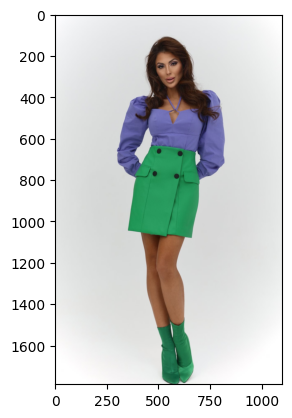

In [7]:
image = cv.imread('images/women.jpeg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

Text(0.5, 0, 'Red')

Text(0.5, 0.5, 'Green')

Text(0.5, 0, 'Blue')

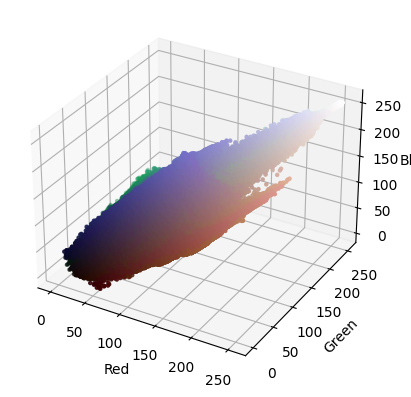

In [8]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

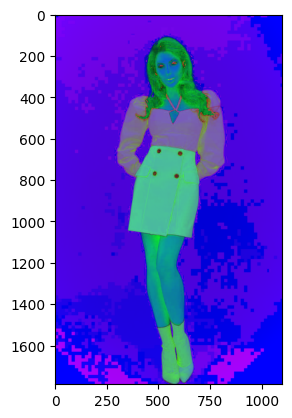

In [96]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
plt.imshow(image_hsv)
plt.show()

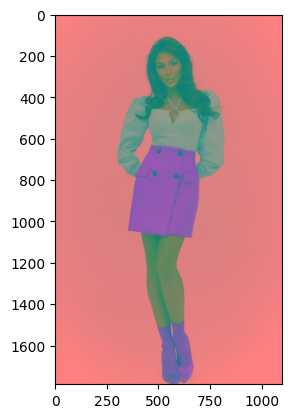

In [97]:
image_lab = cv.cvtColor(image_rgb, cv.COLOR_BGR2Lab)
plt.imshow(image_lab)
plt.show()

Text(0.5, 0, 'Hue')

Text(0.5, 0.5, 'Saturation')

Text(0.5, 0, 'Value')

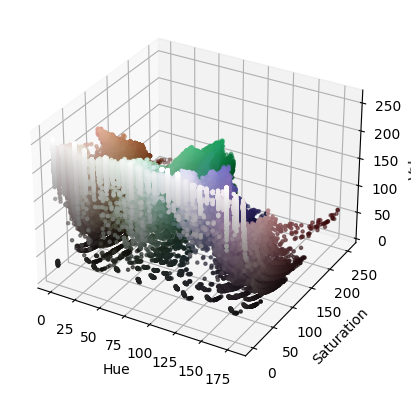

In [100]:
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

<Axes: >

<Axes: >

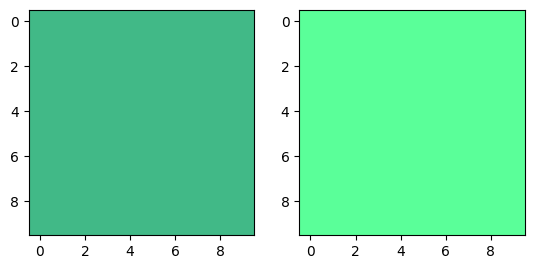

In [139]:
lower_green = np.array([65, 185, 135])
upper_green = np.array([90, 255, 153])

lo_square = np.full((10, 10, 3), lower_green, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_green, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(lo_square)
plt.subplot(1, 2, 2)
plt.imshow(do_square)
plt.show()

<Axes: >

<Axes: >

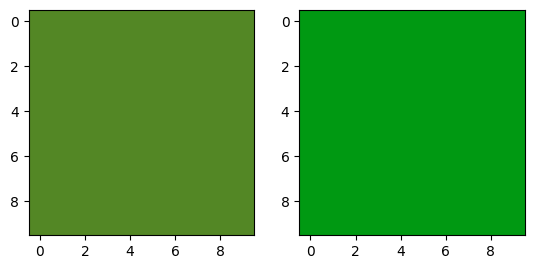

In [140]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

<Figure size 1500x2000 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

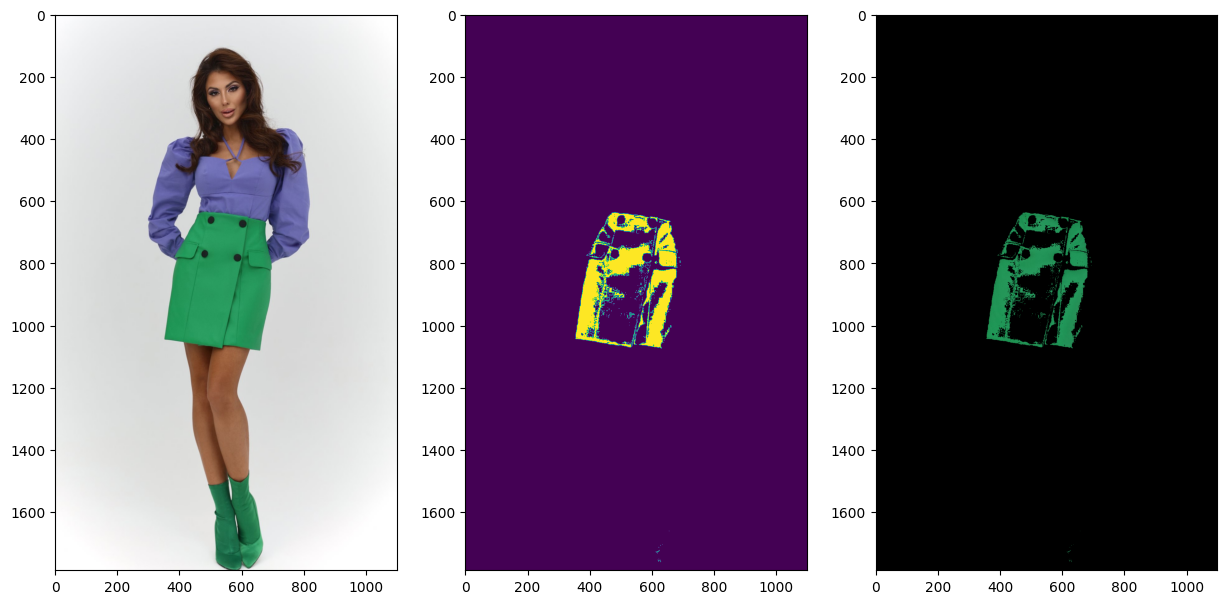

In [141]:
mask = cv.inRange(image_hsv, lower_green, upper_green)
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Исходное изображение')

(([], []), ([], []))

<Axes: >

Text(0.5, 1.0, 'Маска')

(([], []), ([], []))

<Axes: >

(array([2.71202e+05, 4.59000e+02, 9.03000e+02, 1.14500e+03, 7.30000e+02,
        8.23200e+03, 3.45000e+03, 3.19200e+03, 1.30740e+04, 1.61680e+04,
        3.31090e+04, 6.05290e+04, 7.10300e+03, 3.34700e+03, 7.08000e+02,
        2.72000e+02, 2.75000e+02, 8.00000e+01, 5.50000e+01, 2.96000e+02,
        1.94450e+04, 1.24000e+02, 4.90000e+01, 3.00000e+01, 7.63000e+02,
        1.25000e+02, 2.60000e+01, 1.00000e+01, 1.30000e+01, 1.40000e+01,
        9.36670e+04, 6.00000e+00, 5.00000e+00, 2.10000e+01, 4.40000e+01,
        1.61000e+02, 7.29000e+02, 2.00000e+01, 2.00000e+00, 1.80000e+01,
        8.60000e+01, 9.00000e+00, 1.20600e+03, 2.87000e+02, 9.00000e+00,
        1.50000e+01, 3.30000e+01, 1.50000e+01, 3.30000e+01, 8.00000e+00,
        3.34930e+04, 6.20000e+01, 3.00000e+01, 1.50000e+01, 8.00000e+00,
        2.58000e+02, 1.10000e+02, 2.50000e+01, 2.60000e+01, 2.30000e+01,
        1.95000e+02, 2.50000e+01, 8.00000e+01, 1.10000e+02, 4.20000e+01,
        1.41000e+02, 1.01500e+03, 1.94000e+02, 2.16

(<matplotlib.collections.LineCollection at 0x29d455180>,
 <matplotlib.collections.LineCollection at 0x29d5db280>)

Text(0.5, 1.0, 'Гистограмма h слоя')

<Axes: >

Text(0.5, 1.0, 'Изображение с пикселями выделенного цвета')

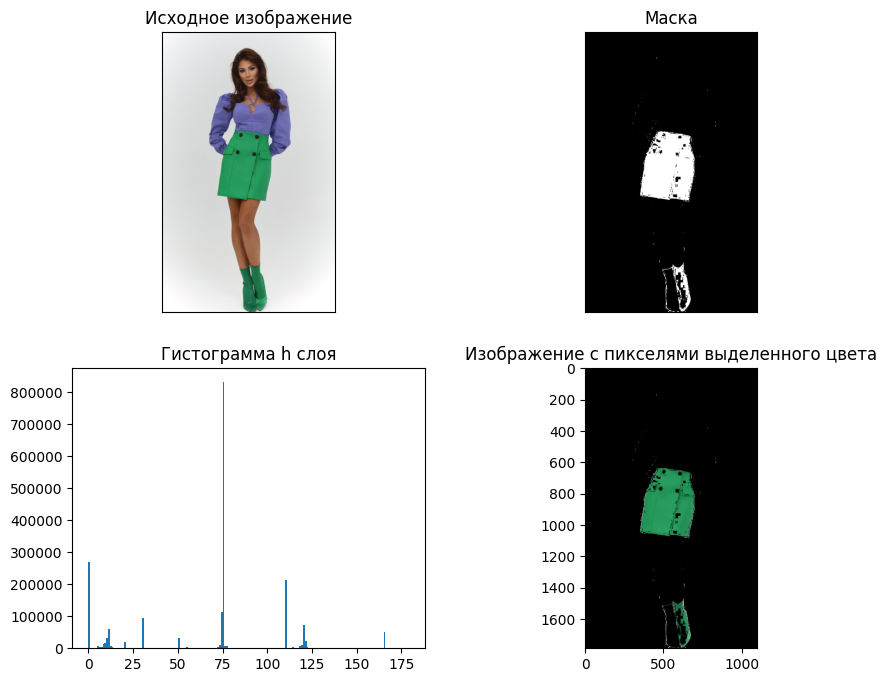

In [92]:
image3 = cv.imread('images/women.jpeg')
rgb_image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)
hsv_image3 = cv.cvtColor(rgb_image3, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_image3)

low_h = 55
high_h = 74

mask = cv.inRange(h, low_h, high_h)
result = cv.bitwise_and(rgb_image3, rgb_image3, mask=mask)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_image3)
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(mask, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(h.reshape(-1), np.max(h), [np.min(h), np.max(h)])
plt.vlines(low_h, 0, 5000, 'r'), plt.vlines(high_h, 0, 5000, 'r')
plt.title('Гистограмма h слоя')
plt.subplot(gs[3])
plt.imshow(result)
plt.title('Изображение с пикселями выделенного цвета')
plt.show()